# Eigencats - PCA on Cat Faces


<figure>
<a id="examples"><center><img src="imgs/eigencats.png" style="width:50%"/></center></a>
<figcaption align = "center"> Figure 1: Some examples of eigencats. </figcaption>
</figure>

This notebook demonstrates computation of *eigencats* using Principal Component Analysis (PCA). Eigencats are linear combinations of cat faces that represent the primary variations in the dataset.

In [1]:
import sys
assert sys.version_info >= (3, 6), "This notebook requires python version >= 3.6 to support type hints."

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [3]:
def plot_cats(imgs: np.ndarray, n: int, start:int=0) -> None:
    """Plots the first n images from imgs, starting from start
    args:
        imgs: a numpy array of shape (N, 64, 64) containing N 64x64 images
        n: number of images to plot
    """
    assert imgs.shape[0] >= n, f"imgs array must contain at least {n} images"
    assert imgs.ndim == 3, f"imgs array must be of shape (N, H, W). If you passed flattened images, reshape them first."
    assert imgs.shape[1:] == (64, 64), f"Images must be of dimension (64, 64) not {imgs.shape[1:]}."
    fig, axes = plt.subplots(1, n)
    if n == 1:
        axes.imshow(imgs[start])
        axes.set_axis_off()
    else:
        for i in range(n):
            axes[i].imshow(imgs[start+i])
            axes[i].set_axis_off()
    plt.show()

The cat faces are stored as a numpy array and are loaded by executing the cell below. Make sure to place the file `cats.npy` in the same folder as this notebook.

In [4]:
cats = np.load('cats.npy')
cats.shape

(80, 64, 64)

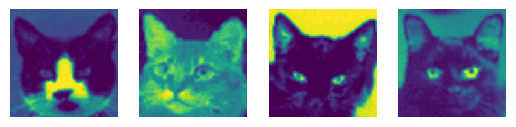

In [5]:
plot_cats(cats, 4)

## Step 1: Preprocessing
Preprocess the data by computing the mean cat, mean-centering, and flattening each image to a vector.

<figure>
<a id="examples"><center><img src="imgs/meancat.png" style="width:15%"/></center></a>
<figcaption align = "center"> Figure 2: Mean cat. </figcaption>
</figure>

In [83]:
def preprocess(cats: np.ndarray) -> np.ndarray:
    """Reshapes each cat image into a 1D vector and column-centers them to have mean 0."""  
    mean_cat = np.mean(cats, axis = 0)
    cats_2 = cats - mean_cat
    cats_2 = np.reshape(cats_2,(80,4096))
    return cats_2

## Step 2: Eigenvalue Decomposition (EVD)
Compute eigencats using eigendecomposition of the covariance matrix.

In [99]:
def sort_eigvectors(eigvalues: np.ndarray, eigvectors: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """Sorts eigenvectors according to their corresponding eigenvalues. The input is expected to be the result of np.linalg.eigh.""" 
    idx = eigvalues.argsort()[::-1]
    eigvalues = eigvalues[idx] 
    eigvectors = eigvectors[:, idx]
    return eigvalues, eigvectors

In [100]:
def eigencats_evd(cat_vectors: np.ndarray) -> np.ndarray:
    covariance = (1/(np.shape(cat_vectors)[0]-1)) * np.matmul(np.transpose(cat_vectors),cat_vectors)
    evs = np.linalg.eigh(covariance)
    evas,evecs = sort_eigvectors(evs.eigenvalues,evs.eigenvectors)
    evec_dummy = np.reshape(np.transpose(evecs),(4096,64,64))
    plot_cats(evec_dummy,4)
    return evecs

(4096, 4096)


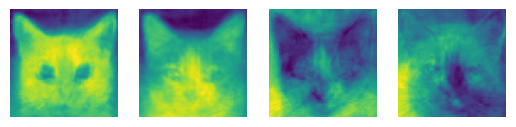

In [86]:
catvecs = preprocess(cats)
a  = eigencats_evd(catvecs)

## Step 3: Singular Value Decomposition (SVD)
Compute eigencats using SVD as an alternative approach.

In [91]:
def eigencats_svd(cats_vectors: np.ndarray) -> np.ndarray:
    evs = np.linalg.svd(cats_vectors)
    evas,evecs = sort_eigvectors(evs.eigenvalues,evs.eigenvectors)
    evec_dummy = np.reshape(np.transpose(evecs),(4096,64,64))
    plot_cats(evec_dummy,4)
    return evs

(4096, 4096)


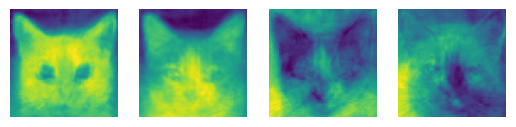

In [93]:
svd_Cats  = eigencats_evd(catvecs)

**Note**: The brightness values for some images might be inverted compared to the examples in [Figure 1](#examples) or those computed using the EVD. This is due to different algorithms used under the hood and you don't need to worry about it.

## Step 4: Image Reconstruction
Reconstruct cat faces using varying numbers of singular values.

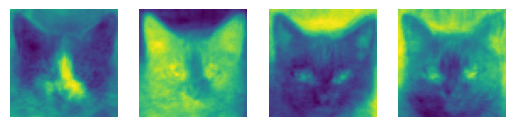

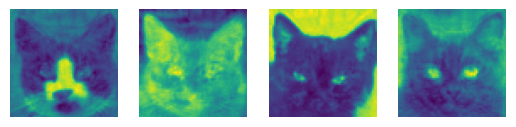

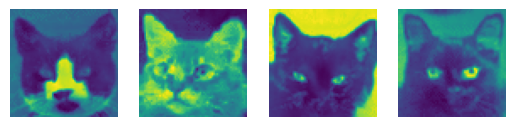

In [98]:
def reconstruct(cats: np.ndarray, num_singular_values: int) -> np.ndarray:
    U,S,Vt = np.linalg.svd(cats,full_matrices=False)
    S[num_singular_values:] = 0
    reconstructed_data = U @ np.diag(S) @ Vt
    return reconstructed_data
reconstructed_10 = np.reshape(reconstruct(catvecs,10),(80,64,64))
reconstructed_40 = np.reshape(reconstruct(catvecs,40),(80,64,64))
reconstructed_80 = np.reshape(reconstruct(catvecs,80),(80,64,64))
plot_cats(reconstructed_10,4)
plot_cats(reconstructed_40,4)
plot_cats(reconstructed_80,4)    


## Step 5: Analysis
Comparing EVD and SVD: both methods produce equivalent results as they capture the same principal directions of variance in the dataset.